In [1]:
import pandas as pd
import geopandas as gpd
import os
import datetime

In [2]:
## read the 100 lines as a demo
df_raw=pd.read_csv('D:/zpz/lu/CDS529/data/sample 10000.csv', usecols= [0,2,3,5, 28,29, 31,32, 33, 34 ], nrows=100)

In [3]:
df_raw.head()

,device_id,latitude,longitude,timestamp,device_home_latitude,device_home_longitude,device_work_latitude,device_work_longitude,location_type,price_sqft_home
0,f654d4a6-3850-4021-98df-1e4de5d5a945,22.291246,114.198296,1693528861,22.3780209,114.2580357,22.37800938,114.2580436,\N,\N
1,f654d4a6-3850-4021-98df-1e4de5d5a945,22.269249,114.240915,1693553045,22.3780209,114.2580357,22.37800938,114.2580436,building-garage,\N
2,f6580b80-1451-48b9-b99f-685c17a54fc8,22.339961,114.134779,1693738855,22.36587731,114.136828,22.36585918,114.1368275,building-hospital,13322.4
3,f6580b80-1451-48b9-b99f-685c17a54fc8,22.339928,114.134885,1693739241,22.36587731,114.136828,22.36585918,114.1368275,building-hospital,13322.4
4,f6580b80-1451-48b9-b99f-685c17a54fc8,22.339945,114.134766,1693739590,22.36587731,114.136828,22.36585918,114.1368275,building-hospital,13322.4


In [4]:
pd.to_datetime(df_raw["timestamp"], unit='s') + pd.Timedelta(days=8/24)  #pd.to_datetime()得到的是utc时间，utc+8小时=本地时间

0    2023-09-01 08:41:01
1    2023-09-01 15:24:05
2    2023-09-03 19:00:55
3    2023-09-03 19:07:21
4    2023-09-03 19:13:10
             ...        
95   2023-09-13 14:13:52
96   2023-09-13 14:40:28
97   2023-09-13 14:50:11
98   2023-09-13 15:29:16
99   2023-09-13 16:54:01
Name: timestamp, Length: 100, dtype: datetime64[ns]

In [5]:
gfs = []
for f in os.listdir('D:/zpz/lu/CDS529/tpu_data_geo/'):
    if 'shp' not in f:
        continue
    if '._' in f:
        continue
    ## GBK for encode Chinese
    shapefile = gpd.read_file('D:/zpz/lu/CDS529/tpu_data_geo/%s' % f, encoding="GBK")
    tupid = f.split('_')[1].split('.')[0]
    shapefile['tpuid'] = tupid
    ## set crs
    shapefile.crs = 'EPSG:4326'
    gfs.append(shapefile)
gfs = gpd.GeoDataFrame(pd.concat(gfs))
## select two columns only
sel_cols = ['tpuid', 'geometry']
gfs_sel = gfs[sel_cols]

<Axes: >

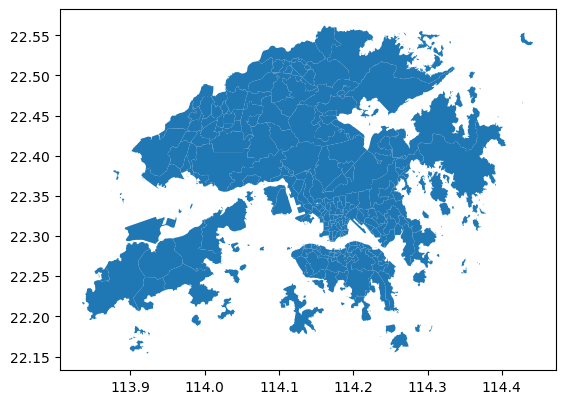

In [6]:
## the filed geometry is used when do plotting
gfs_sel.plot()

In [7]:
a = gfs_sel[gfs_sel.tpuid == '741S']


In [8]:
a.geometry.isin([])

0    False
Name: geometry, dtype: bool